In [1]:
import sys
import os

# Adiciona o diretório correto ao path
# Ajuste o caminho conforme sua estrutura real
sys.path.insert(0, os.getcwd())
print(f"✅ Diretório atual adicionado ao path: {os.getcwd()}")

from fuzzy_systems.learning.anfis import ANFIS


import numpy as np
import matplotlib.pyplot as plt

# Configurar matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['figure.dpi'] = 100

print("✅ Bibliotecas importadas com sucesso!")
print(f"   Versão do NumPy: {np.__version__}")


from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd


✅ Diretório atual adicionado ao path: /Users/1moi6/Desktop/Minicurso Fuzzy/fuzzy_systems
✅ MamdaniLearning implementado com sucesso!

Características:
  • Aprendizado por gradiente: batch, online, mini-batch
  • Otimização metaheurística: PSO, DE, GA
  • Defuzzificação: COG e COS
  • Caching de ativações para otimização eficiente
  • Extração de regras linguísticas
✅ Módulo de EDO Fuzzy implementado com sucesso!

Características:
  • Integração completa com fuzzy_systems.core
  • Suporte a FuzzySet, triangular, gaussiana, trapezoidal
  • Método de α-níveis vetorizado
  • Paralelização automática (joblib)
  • Condições iniciais e parâmetros fuzzy
  • Visualização de envelopes por α-nível
✅ Bibliotecas importadas com sucesso!
   Versão do NumPy: 2.2.6


In [2]:
# Load dataset
iris = load_iris()

X = iris.data # Shape (150, 4) - 4 features
y = iris.target
y_binary = (y != 0).astype(int)  # 0 = Setosa, 1 = Não-Setosa


feature_names = iris.feature_names 
class_names = iris.target_names

# Create DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

print('📊 Iris dataset loaded!')
print(f'\nShape: {X.shape}')
print(f'\nClasses: {iris.target_names}')
print(f'\nFeatures: {iris.feature_names}')
df.head()

📊 Iris dataset loaded!

Shape: (150, 4)

Classes: ['setosa' 'versicolor' 'virginica']

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Visualize feature distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(iris.feature_names):
    for species_id, species_name in enumerate(iris.target_names):
        data = df[df['species'] == species_name][feature]
        axes[idx].hist(data, alpha=0.6, bins=15, label=species_name)
    
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Distribution: {feature}', fontsize=12, weight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


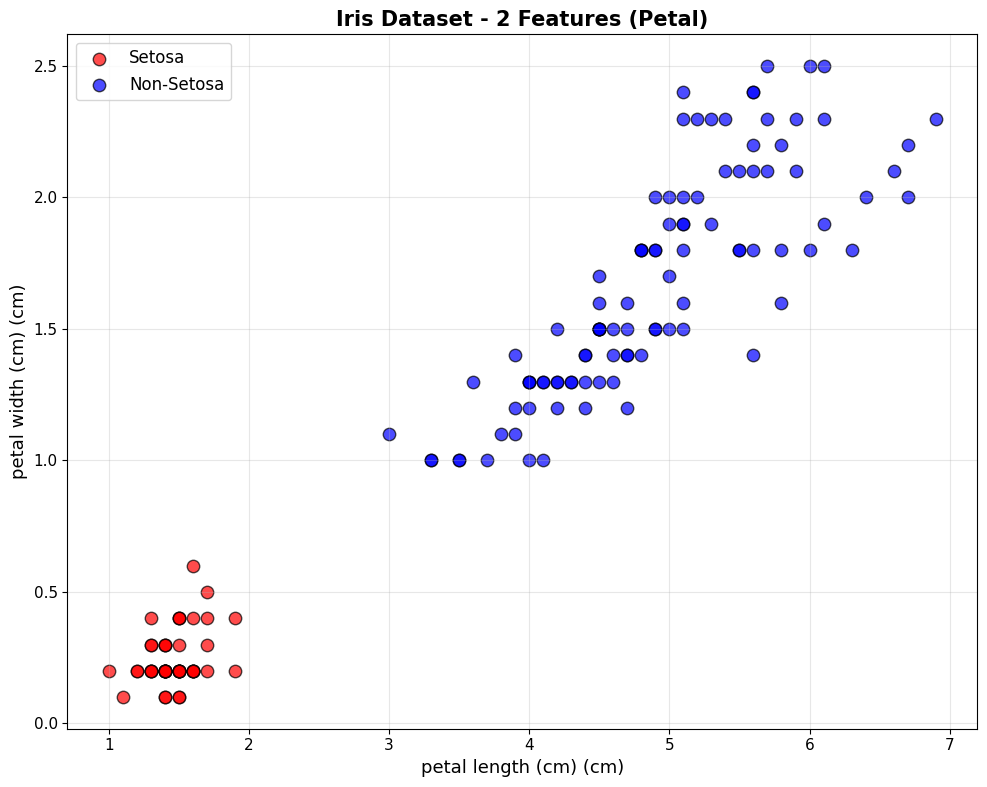

Note: Setosa is clearly separable from other classes!


In [3]:
X = X[:,2:4]
feature_names = ['Petal Length (cm)', 'Petal Width (cm)']
class_names = ['setosa', 'versicolor', 'virginica']


#Visualize separability
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['red', 'blue']
labels = ['Setosa', 'Non-Setosa']

for class_id in [0, 1]:
    mask = y_binary == class_id
    ax.scatter(X[mask, -2], X[mask, -1], 
              c=colors[class_id], label=labels[class_id],
              s=80, alpha=0.7, edgecolors='black', linewidth=1)

ax.set_xlabel(iris.feature_names[-2] + ' (cm)', fontsize=13)
ax.set_ylabel(iris.feature_names[-1] + ' (cm)', fontsize=13)
ax.set_title('Iris Dataset - 2 Features (Petal)', fontsize=15, weight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('Note: Setosa is clearly separable from other classes!')

In [4]:
# Example 2: Classification
print("\n" + "="*70)
print("EXAMPLE 2: CLASSIFICATION")
print("="*70)


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalize data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)


for i in range(X_train.shape[1]):
    print(f'Feature {i+1} - Train: [{X_train_norm[:, i].min():.2f}, {X_train_norm[:, i].max():.2f}] | '
          f'Validation: [{X_val_norm[:, i].min():.2f}, {X_val_norm[:, i].max():.2f}] | '
          f'Test: [{X_test_norm[:, i].min():.2f}, {X_test_norm[:, i].max():.2f}]')


EXAMPLE 2: CLASSIFICATION
Feature 1 - Train: [-1.51, 1.78] | Validation: [-1.46, 1.32] | Test: [-1.57, 1.21]
Feature 2 - Train: [-1.45, 1.76] | Validation: [-1.32, 1.76] | Test: [-1.32, 1.49]


In [10]:
# Create and train model for classification
num_inputs = len(X_train_norm[0,:])
input_ranges = [[X_train_norm[:, idx].min(), X_train_norm[:, idx].max()] for idx in range(num_inputs)]

model_cls = ANFIS(n_inputs=num_inputs, 
                    n_mfs=[3]*num_inputs, 
                    mf_type='gaussmf',
                    input_ranges=input_ranges,
                    classification=True, 
                    learning_rate=5e-1,
                    lambda_l2=0.001, 
                    batch_size=128,
                    use_adaptive_lr=True)

# model_cls.fit(X_train_norm, 
#                 y_train, 
#                 epochs=500, 
#                 verbose=True,
#                 X_val=X_val_norm, 
#                 y_val=y_val, 
#                 early_stopping_patience=100)

model_cls.fit_metaheuristic(
    X_train_norm, y_train,
    optimizer='pso',
    n_particles=100,
    n_iterations=500,
    X_val=X_val_norm,
    y_val=y_val,
    verbose=True,
    )




📊 Classification Mode: 2 classes detected
   Classes: [0 1]

ANFIS METAHEURISTIC TRAINING
  Inputs:           2
  MFs per input:    [3, 3]
  Total rules:      9
  Training samples: 105
  Validation samples: 22
  Optimizer:        PSO
  Population:       100
  Iterations:       500
  Early stopping:   20 iterations
  Restore best:     True

Starting optimization...

  PSO [  1/500] Best: 0.772321, w=0.900
  PSO [ 11/500] Best: 0.297652, w=0.890
  PSO [ 21/500] Best: 0.288394, w=0.880
  PSO [ 31/500] Best: 0.268699, w=0.870
  PSO [ 41/500] Best: 0.229754, w=0.860
  PSO [ 51/500] Best: 0.194454, w=0.850
  PSO [ 61/500] Best: 0.182465, w=0.840
  PSO [ 71/500] Best: 0.182465, w=0.830
  PSO [ 81/500] Best: 0.165966, w=0.820
  PSO [ 91/500] Best: 0.162507, w=0.810
  PSO [101/500] Best: 0.119202, w=0.800
  PSO [111/500] Best: 0.117116, w=0.790
  PSO [121/500] Best: 0.103825, w=0.780
  PSO [131/500] Best: 0.103825, w=0.770
  PSO [141/500] Best: 0.103825, w=0.760
  PSO [151/500] Best: 0.100022,

In [14]:
model_cls.fit(X_train_norm, 
                y_train, 
                epochs=500, 
                verbose=True,
                X_val=X_val_norm, 
                y_val=y_val, 
                early_stopping_patience=100)

ANFIS TRAINING
  Inputs:           2
  MFs per input:    [3, 3]
  Total rules:      9
  Training samples: 105
  Validation samples: 22
  Epochs:           500
  Batch size:       128
  Learning rate:    0.5
  Adaptive LR:      True
  Regularization:   Ridge (L2)
    L1 (λ₁):        0.0
    L2 (λ₂):        0.001
  Train premises:   True
  Early stopping:   100 epochs
  Restore best:     True

Epoch   1/500 | Train - Loss: 0.000000, Acc: 1.0000, Cost: 0.012362, Acc: 1.0000 | Val - Loss: 0.000015, Acc: 1.0000 | Time: 0.12s
    ✅ New best validation loss: 0.000014
Epoch   2/500 | Train - Loss: 0.000000, Acc: 1.0000, Cost: 0.012359, Acc: 1.0000 | Val - Loss: 0.000014, Acc: 1.0000 | Time: 0.08s
    ✅ New best validation loss: 0.000012
Epoch   3/500 | Train - Loss: 0.000000, Acc: 1.0000, Cost: 0.012357, Acc: 1.0000 | Val - Loss: 0.000012, Acc: 1.0000 | Time: 0.17s
    ✅ New best validation loss: 0.000011
Epoch   4/500 | Train - Loss: 0.000000, Acc: 1.0000, Cost: 0.012355, Acc: 1.0000 | Val - 

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Non-Setosa       1.00      1.00      1.00        15

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



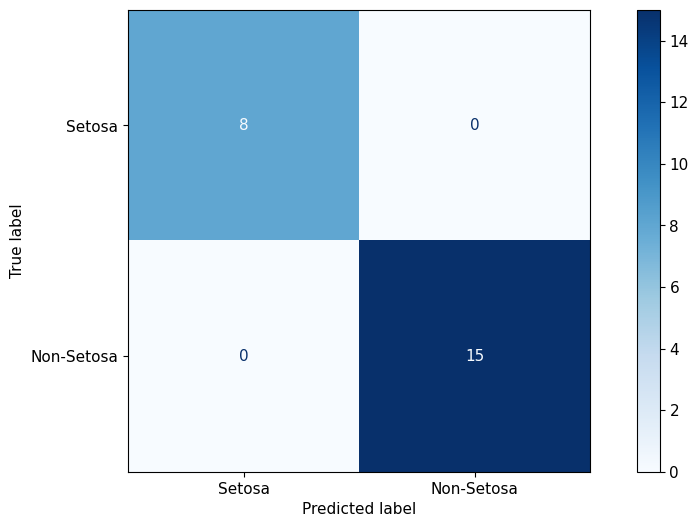

In [11]:
# Evaluate
y_pred_ = model_cls.predict(X_test_norm)
print(classification_report(y_test, y_pred_, target_names=labels))
cm= confusion_matrix(y_test, y_pred_)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap=plt.cm.Blues)


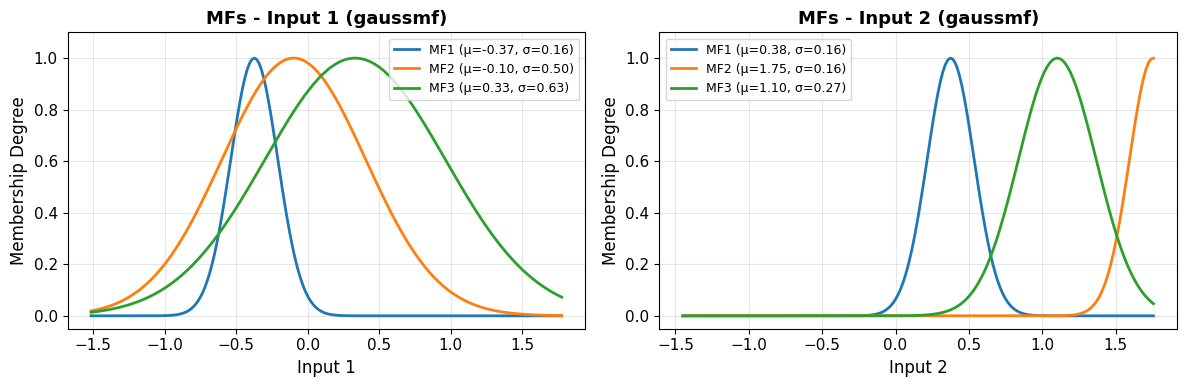

In [12]:
fg = model_cls.plot_membership_functions()

ℹ️  Showing hybrid training metrics (fit).
   To see metaheuristic convergence, use: plot_metrics(metaheuristic=True)


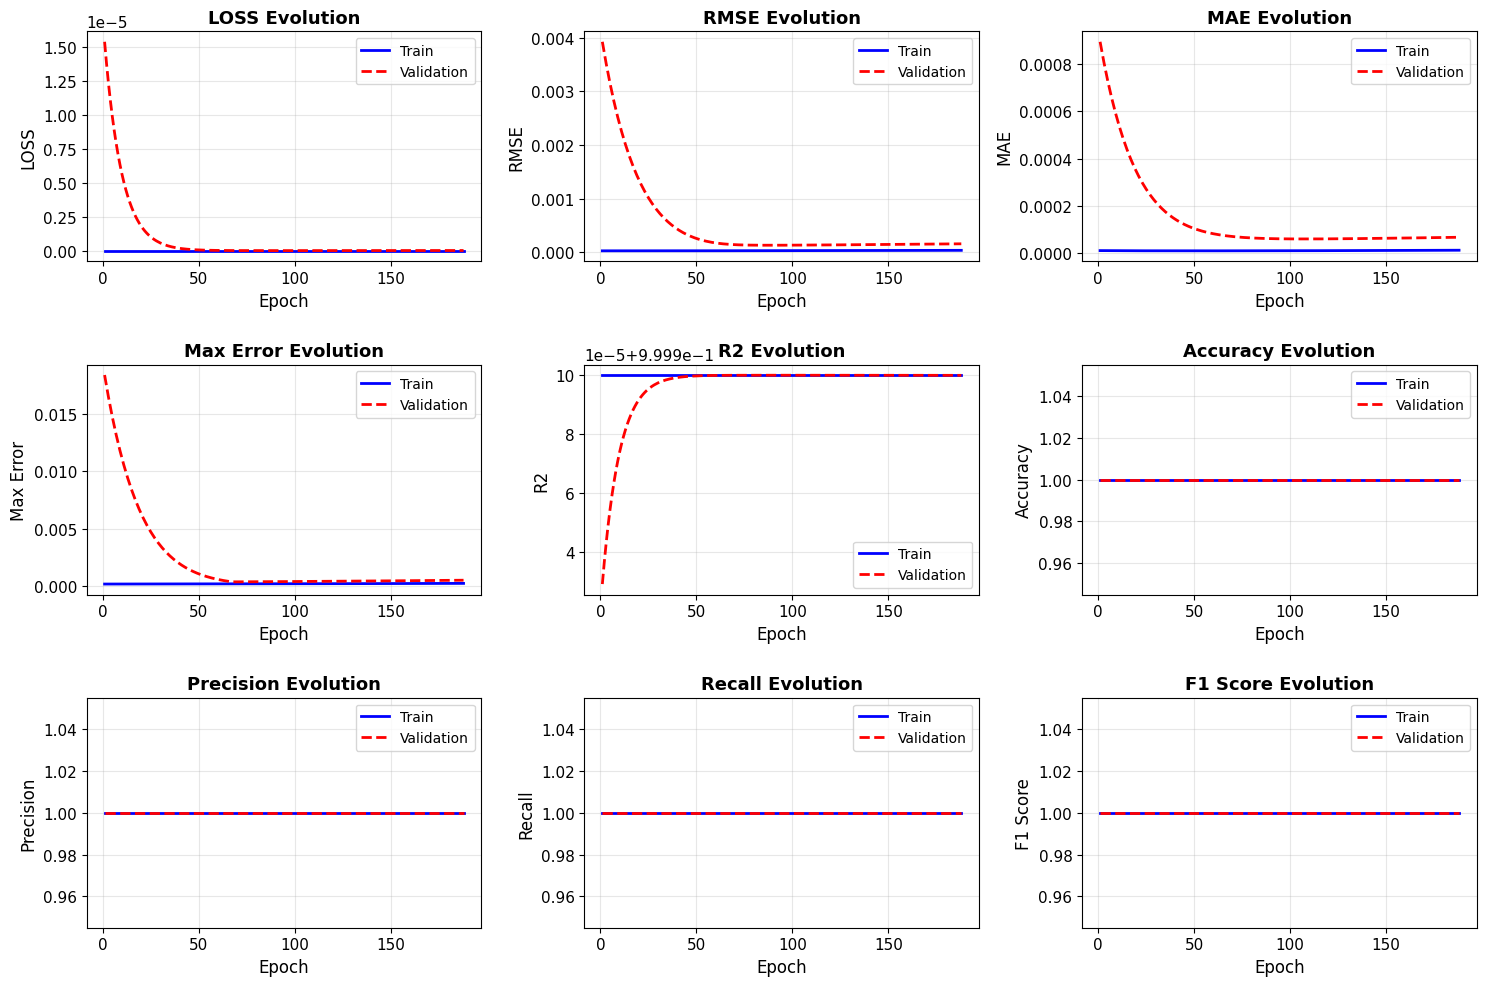

In [15]:
fg = model_cls.plot_metrics()

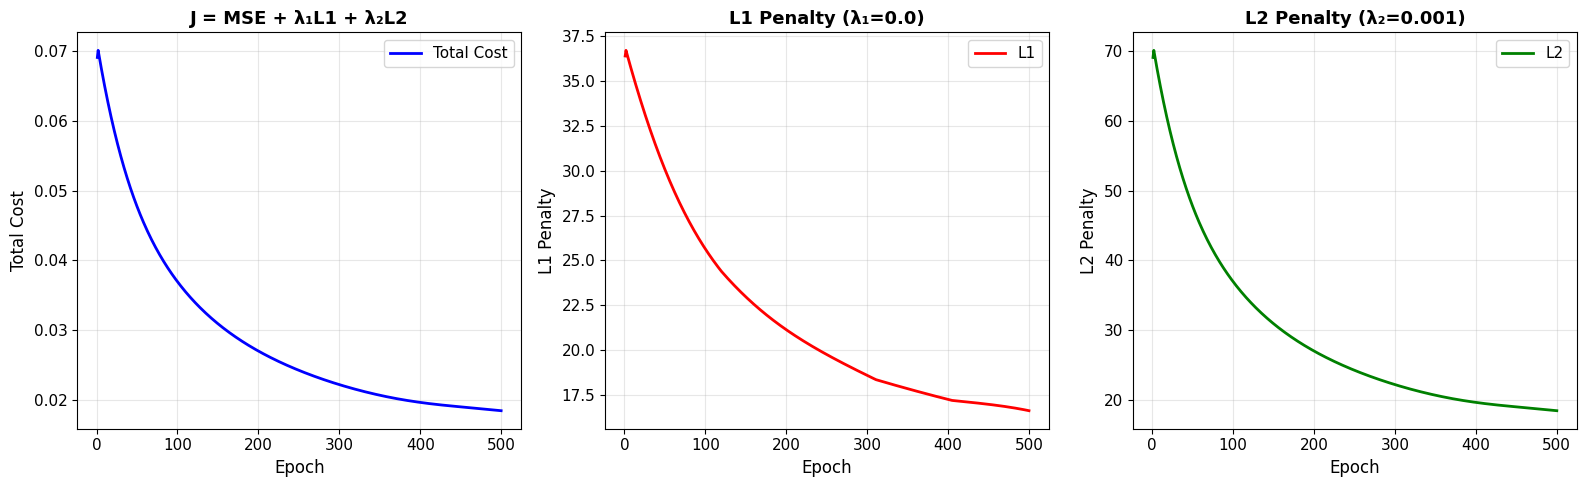

In [9]:
fg = model_cls.plot_regularization()

In [ ]:
df = model_cls.rules_to_dataframe()
df

In [ ]:
fg = model_cls.show_rules_table()

In [ ]:
hist = model_cls.metaheuristic_history['convergence']
pd.DataFrame(hist)